# AIML Module Project -Ensemble Techniques 

Name: Nikhil Sharma

Email ID: nikhil.10.sharma@outlook.com

In [1]:
%%capture
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

1. Data Understanding & Exploration: [5 Marks]

A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]


In [3]:
df1=pd.read_csv('TelcomCustomer-Churn_1.csv')

In [4]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
df1.shape

(7043, 10)

B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [6]:
df2=pd.read_csv('TelcomCustomer-Churn_2.csv')

In [7]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df2.shape

(7043, 12)

In [9]:
if set(df1.columns) == set(df2.columns):
    print("Both the DataFrames have same columns")
else:
    print("Some difference are there in the DataFrames")

Some difference are there in the DataFrames


C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

In [10]:
df_merged = pd.merge(df1, df2, how='inner', on='customerID')

In [11]:
df_merged.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df_merged.shape

(7043, 21)

D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

In [13]:
set(df_merged.columns) == set(df1.columns).union(set(df2.columns))

True

In [14]:
df1.shape[0] and df2.shape[0] == df_merged.shape[0]

True

In [15]:
(df1.shape[1] + df2.shape[1]) -1  == df_merged.shape[1]

True

2. Data Cleaning & Analysis: [15 Marks]

A. Impute missing/unexpected values in the DataFrame. [2 Marks]

In [16]:
#checking duplicates
df_merged.duplicated().value_counts()

False    7043
Name: count, dtype: int64

In [17]:
# duplicates present in the dataset
df_merged[df_merged.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df_merged.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df_merged.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

for i in col:
    print([i], df_merged[i].unique())

['gender'] ['Female' 'Male']
['SeniorCitizen'] [0 1]
['Partner'] ['Yes' 'No']
['Dependents'] ['No' 'Yes']
['tenure'] [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['PhoneService'] ['No' 'Yes']
['MultipleLines'] ['No phone service' 'No' 'Yes']
['InternetService'] ['DSL' 'Fiber optic' 'No']
['OnlineSecurity'] ['No' 'Yes' 'No internet service']
['OnlineBackup'] ['Yes' 'No' 'No internet service']
['DeviceProtection'] ['No' 'Yes' 'No internet service']
['TechSupport'] ['No' 'Yes' 'No internet service']
['StreamingTV'] ['No' 'Yes' 'No internet service']
['StreamingMovies'] ['No' 'Yes' 'No internet service']
['Contract'] ['Month-to-month' 'One year' 'Two year']
['PaperlessBilling'] ['Yes' 'No']
['PaymentMethod'] ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['MonthlyCharges

In [22]:
for j in col:
    print(df_merged[j].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No

In the columns:

    1. 'MultipleLines' values 'No phone service' can be imputed to  'No'
    2. 'OnlineSecurity' values 'No internet service' can be immputed as 'No'
    3. 'OnlineBackup' values 'No internet service' can be immputed as 'No'
    4. 'DeviceProtection' values 'No internet service' can be immputed as 'No'
    5. 'TechSupport' values 'No internet service' can be immputed as 'No'
    6. 'StreamingTV' values 'No internet service' can be immputed as 'No'
    7. 'StreamingMovies' values 'No internet service' can be immputed as 'No'
    8. 'PaymentMethod' values 'Bank transfer (automatic)' and  'Credit card (automatic)' can be imputed as Automatic.
    9. Also in 'InternetService' values  'DSL' and  'Fiber optic' could be imputed as Yes but for now les keep them as it is because both values could have different impact.
    10. Further 'tenure' could be devided into categories depending upong ranges of less than, greater than but we do not have insights of the 'tenure' feature. So, we will keep it as it is.

In [23]:
print(df_merged['MultipleLines'].value_counts())
df_merged['MultipleLines'] = df_merged['MultipleLines'].replace('No phone service', 'No')
df_merged['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

In [24]:
print(df_merged['OnlineSecurity'].value_counts())
df_merged['OnlineSecurity'] = df_merged['OnlineSecurity'].replace('No internet service', 'No')
df_merged['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

In [25]:
print(df_merged['OnlineBackup'].value_counts())
df_merged['OnlineBackup'] = df_merged['OnlineBackup'].replace('No internet service', 'No')
df_merged['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

In [26]:
print(df_merged['DeviceProtection'].value_counts())
df_merged['DeviceProtection'] = df_merged['DeviceProtection'].replace('No internet service', 'No')
df_merged['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

In [27]:
print(df_merged['TechSupport'].value_counts())
df_merged['TechSupport'] = df_merged['TechSupport'].replace('No internet service', 'No')
df_merged['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

In [28]:
print(df_merged['StreamingTV'].value_counts())
df_merged['StreamingTV'] = df_merged['StreamingTV'].replace('No internet service', 'No')
df_merged['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

In [29]:
print(df_merged['StreamingMovies'].value_counts())
df_merged['StreamingMovies'] = df_merged['StreamingMovies'].replace('No internet service', 'No')
df_merged['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

In [30]:
print(df_merged['PaymentMethod'].value_counts())
df_merged['PaymentMethod'] = df_merged['PaymentMethod'].replace('Bank transfer (automatic)', 'Automatic')
df_merged['PaymentMethod'] = df_merged['PaymentMethod'].replace('Credit card (automatic)', 'Automatic')
df_merged['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


PaymentMethod
Automatic           3066
Electronic check    2365
Mailed check        1612
Name: count, dtype: int64

In [31]:
# further 'PaymentMethod' can aslo be put int 2 categories, i.e Automatic and Check
print(df_merged['PaymentMethod'].value_counts())
df_merged['PaymentMethod'] = df_merged['PaymentMethod'].replace('Electronic check', 'Cheque')
df_merged['PaymentMethod'] = df_merged['PaymentMethod'].replace('Mailed check', 'Cheque')
df_merged['PaymentMethod'].value_counts()

PaymentMethod
Automatic           3066
Electronic check    2365
Mailed check        1612
Name: count, dtype: int64


PaymentMethod
Cheque       3977
Automatic    3066
Name: count, dtype: int64

B. Make sure all the variables with continuous values are of ‘Float’ type. [For Example: MonthlyCharges, TotalCharges]

In [32]:
df_merged.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [33]:
df_merged['TotalCharges'] = df_merged['TotalCharges'].replace(' ', np.nan).astype(float)

In [34]:
# SeniorCitizen is in int format and also needs to be converted in object as we will treat it as category
df_merged['SeniorCitizen'] = df_merged['SeniorCitizen'].astype(object)

In [35]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

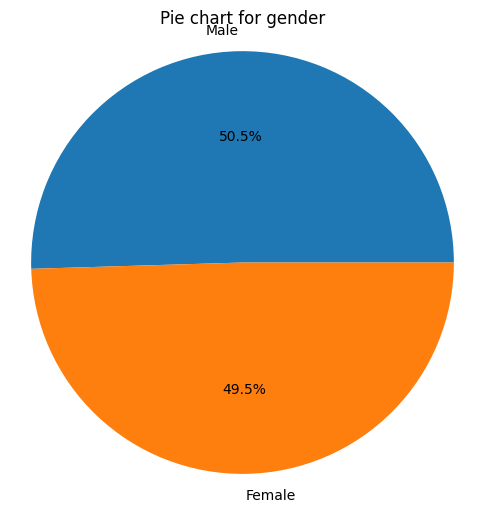

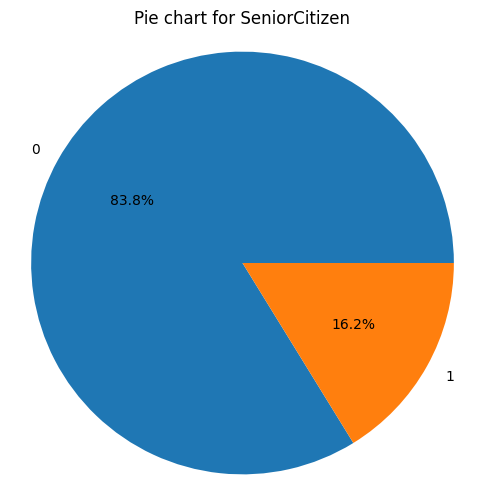

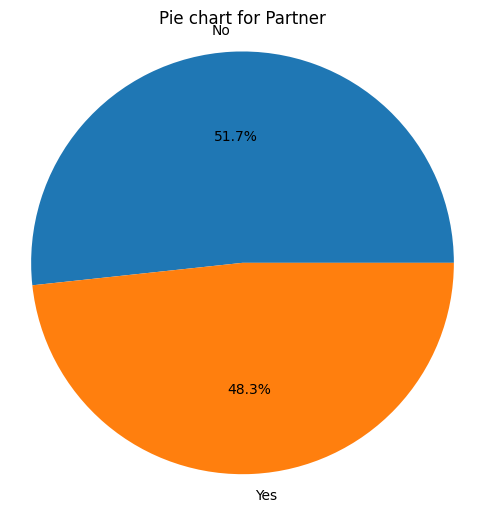

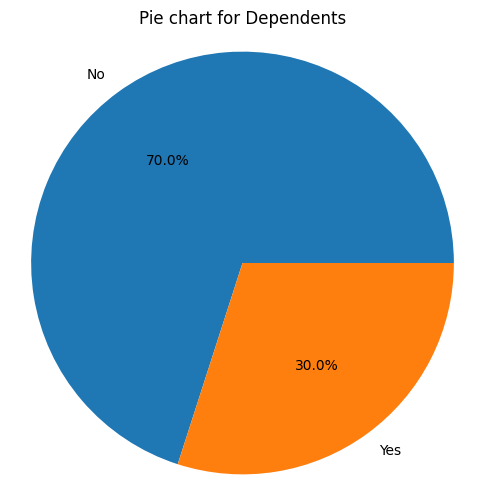

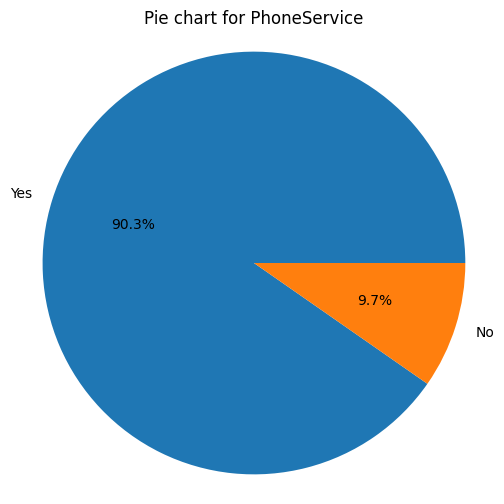

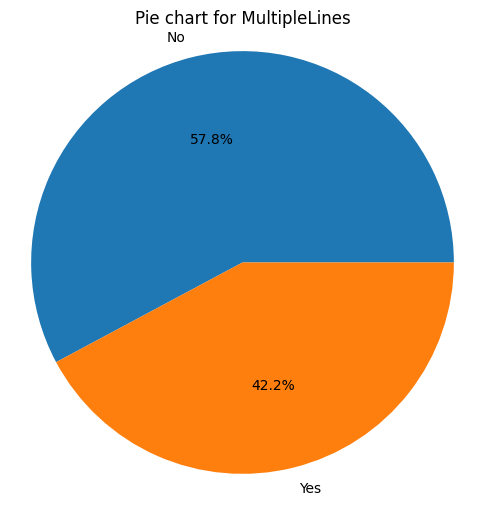

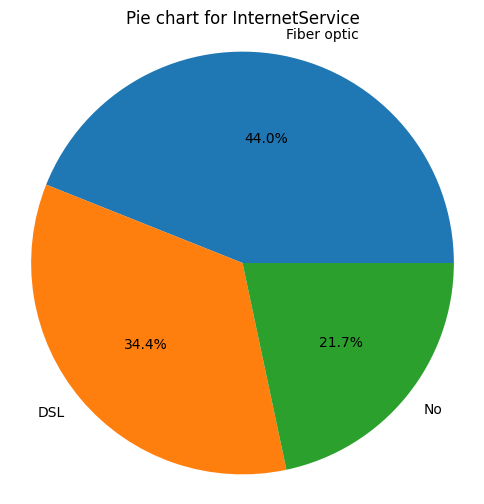

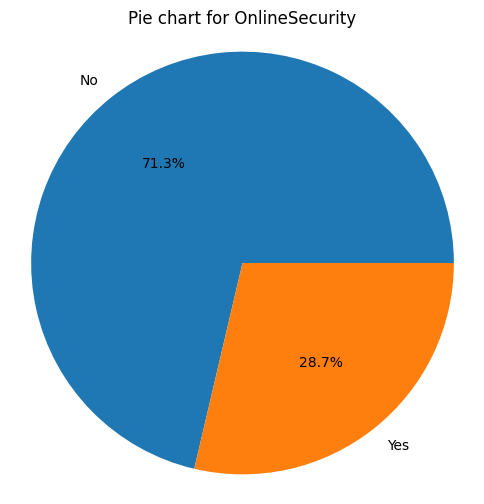

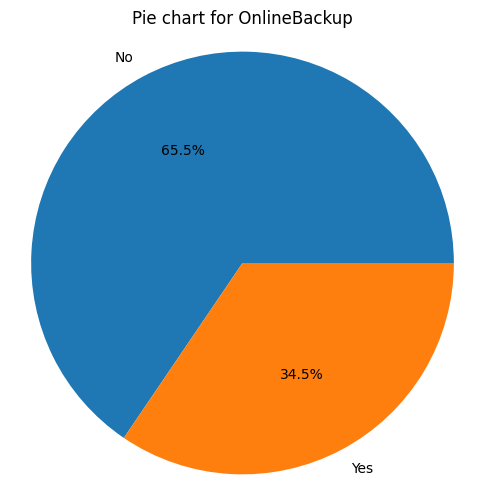

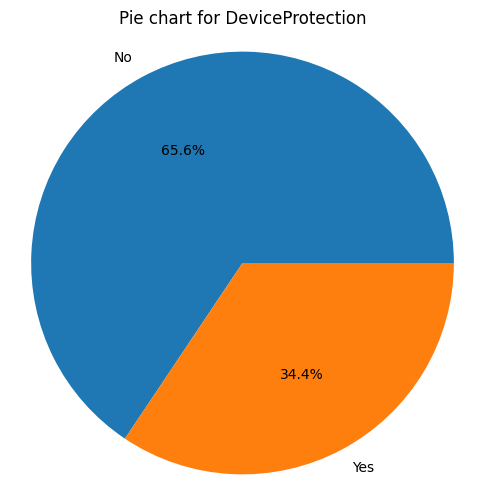

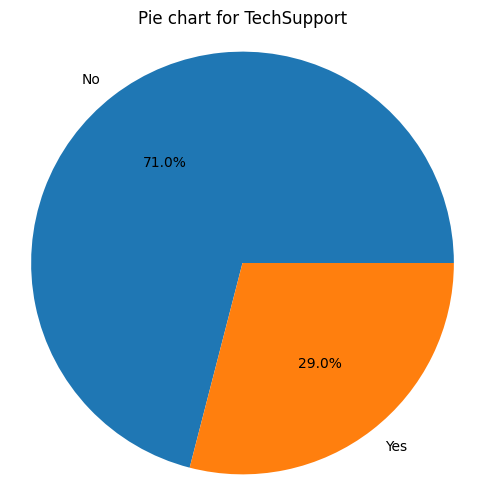

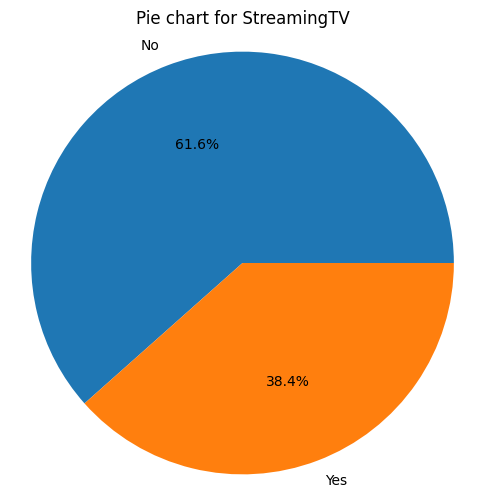

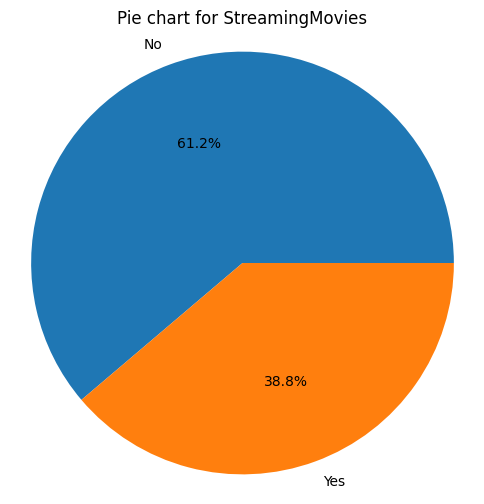

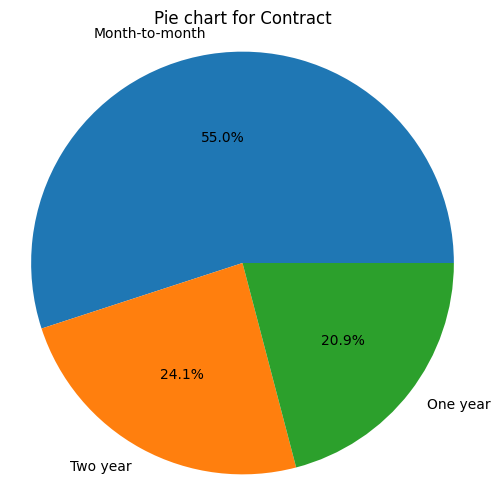

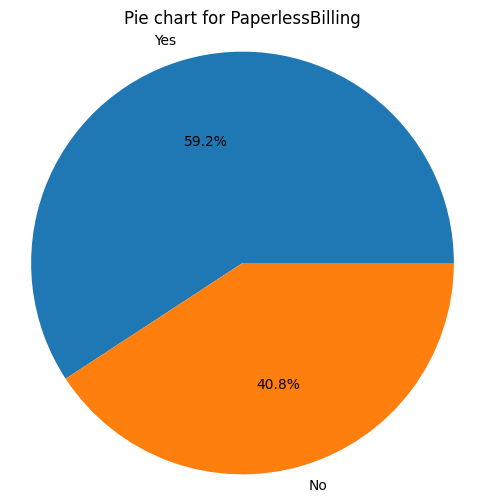

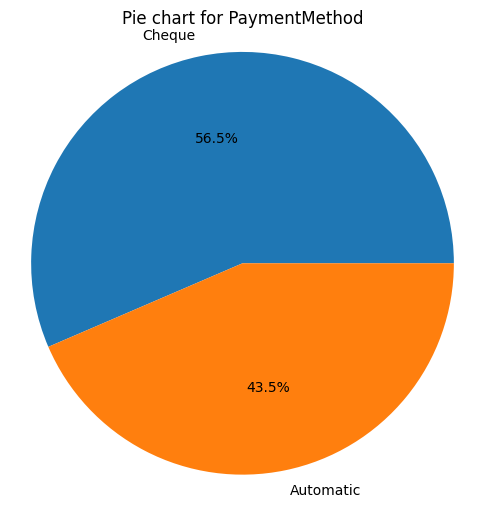

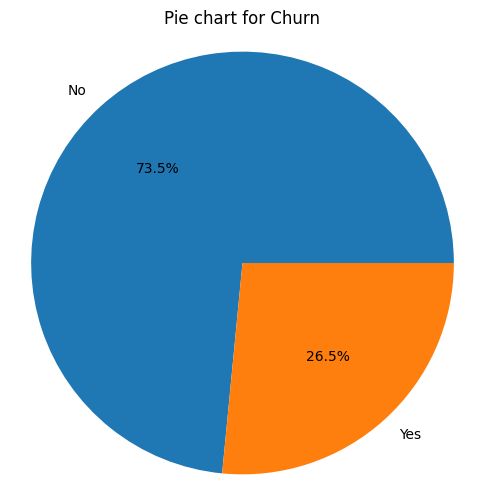

In [36]:
def pie_charts(DataFrame):
    obj_columns = DataFrame.select_dtypes(include=['object']).columns
    for i in obj_columns:
        count = DataFrame[i].value_counts()
        plt.figure(figsize=(6,6))
        plt.pie(count, labels=count.index, autopct='%1.1f%%')
        plt.title(f'Pie chart for {i}')
        plt.axis('equal')
        plt.show()
        
DataFrame = df_merged.drop('customerID', axis=1)
pie_charts(DataFrame)

D. Share insights for Q2.c.

Obesrvations:
        
        1. The ratio for Male and Female gender is almost equally distriuted, 50.5% Male and 49.5% female.
        2. Only 16.2% of the total customers below to senior citizen category. Most of the customers does'nt belong to senior citizen category.
        3. 51.7% of the customers have partners and 48.3% have not.
        4. Only 30% of the customers have dependants.
        5. Most of the cutomers (90.3%) use phone service.
        6. 57.8% customers, that is more than half of total customers have multiple lines.
        7. Almost half of the customers (44%) have Fiber optic, 34.4% have DSL and 21.7% don't have internet services.
        8. Most of the customers have not opted for add-on services like Online Security, Online backup, Device protection, Tech support, Streaming TV and Streaming Movies. 
        9.  More than half of the customers (55%) go for monthly payments 20.9% have and yearly contract and 24.1% have a 2 year contract.
        10. 59.2 % go for paperless billing and 43.5% have opted for automatic payment method.

E. Encode all the appropriate Categorical features with the best suitable approach.

In [37]:
# Now lets convert the columns with an 'object' datatype into categorical variables
for feature in df_merged.columns: # Loop through all columns in the dataframe
    if df_merged[feature].dtype == 'object': # Only apply for columns with categorical strings
        df_merged[feature] = pd.Categorical(df_merged[feature])# Replace strings with an integer

In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [39]:
oneHotCols=['Contract','InternetService']
df_merged=pd.get_dummies(df_merged, columns=oneHotCols, dtype=int) 
df_merged.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,Yes,No,1,No,No,No,Yes,...,Cheque,29.85,29.85,No,1,0,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,Cheque,56.95,1889.50,No,0,1,0,1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,Cheque,53.85,108.15,Yes,1,0,0,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,No,...,Automatic,42.30,1840.75,No,0,1,0,1,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,Cheque,70.70,151.65,Yes,1,0,0,0,1,0


In [40]:
#shifting 'Churn' column to the end
churn_column = df_merged['Churn'].copy()
df_merged.drop('Churn', axis=1, inplace=True)
df_merged['Churn'] = churn_column
df_merged.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,No,Yes,...,Cheque,29.85,29.85,1,0,0,1,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,Cheque,56.95,1889.50,0,1,0,1,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,Cheque,53.85,108.15,1,0,0,1,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,No,...,Automatic,42.30,1840.75,0,1,0,1,0,0,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,Cheque,70.70,151.65,1,0,0,0,1,0,Yes


In [41]:
df_merged.shape

(7043, 25)

In [42]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customerID                   7043 non-null   category
 1   gender                       7043 non-null   category
 2   SeniorCitizen                7043 non-null   category
 3   Partner                      7043 non-null   category
 4   Dependents                   7043 non-null   category
 5   tenure                       7043 non-null   int64   
 6   PhoneService                 7043 non-null   category
 7   MultipleLines                7043 non-null   category
 8   OnlineSecurity               7043 non-null   category
 9   OnlineBackup                 7043 non-null   category
 10  DeviceProtection             7043 non-null   category
 11  TechSupport                  7043 non-null   category
 12  StreamingTV                  7043 non-null   category
 13  Str

In [43]:
replaceStruct = {"gender":     {"Female": 0, "Male": 1 },
                "Partner":     {"No": 1, "Yes": 2 },
                "Dependents":     {"No": 1, "Yes": 2 },
                "PhoneService":     {"No": 1, "Yes": 2 },
                "MultipleLines":     {"No": 1, "Yes": 2 },
                "OnlineSecurity":     {"No": 1, "Yes": 2 },
                "OnlineBackup":     {"No": 1, "Yes": 2 },
                "DeviceProtection":     {"No": 1, "Yes": 2 },
                "TechSupport":     {"No": 1, "Yes": 2 },
                "StreamingTV":     {"No": 1, "Yes": 2 },
                "StreamingMovies":     {"No": 1, "Yes": 2 }, 
                "PaperlessBilling":     {"No": 1, "Yes": 2 },
                "PaymentMethod":     {"Cheque": 0, "Automatic": 1 },
                "Churn":     {"No": 1, "Yes": 2 }}

df_merged = df_merged.replace(replaceStruct)

In [44]:
# Now lets convert the columns with an 'object' datatype into categorical variables
for feature in df_merged.columns: # Loop through all columns in the dataframe
    if df_merged[feature].dtype == 'int': # Only apply for columns with categorical strings
        df_merged[feature] = pd.Categorical(df_merged[feature])# Replace strings with an integer

In [45]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customerID                   7043 non-null   category
 1   gender                       7043 non-null   category
 2   SeniorCitizen                7043 non-null   category
 3   Partner                      7043 non-null   category
 4   Dependents                   7043 non-null   category
 5   tenure                       7043 non-null   int64   
 6   PhoneService                 7043 non-null   category
 7   MultipleLines                7043 non-null   category
 8   OnlineSecurity               7043 non-null   category
 9   OnlineBackup                 7043 non-null   category
 10  DeviceProtection             7043 non-null   category
 11  TechSupport                  7043 non-null   category
 12  StreamingTV                  7043 non-null   category
 13  Str

In [46]:
df_merged.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Churn
0,7590-VHVEG,0,0,2,1,1,1,1,1,2,...,0,29.85,29.85,1,0,0,1,0,0,1
1,5575-GNVDE,1,0,1,1,34,2,1,2,1,...,0,56.95,1889.50,0,1,0,1,0,0,1
2,3668-QPYBK,1,0,1,1,2,2,1,2,2,...,0,53.85,108.15,1,0,0,1,0,0,2
3,7795-CFOCW,1,0,1,1,45,1,1,2,1,...,1,42.30,1840.75,0,1,0,1,0,0,1
4,9237-HQITU,0,0,1,1,2,2,1,1,1,...,0,70.70,151.65,1,0,0,0,1,0,2


F. Split the data into 80% train and 20% test.

In [47]:
# let's fdrop the customerID feature as it is a unique Id and will not contribute to our model
df_merged= df_merged.drop('customerID', axis=1)
df_merged.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Churn'],
      dtype='object')

In [63]:
df_merged.isnull().sum()

gender                          0
SeniorCitizen                   0
Partner                         0
Dependents                      0
tenure                          0
PhoneService                    0
MultipleLines                   0
OnlineSecurity                  0
OnlineBackup                    0
DeviceProtection                0
TechSupport                     0
StreamingTV                     0
StreamingMovies                 0
PaperlessBilling                0
PaymentMethod                   0
MonthlyCharges                  0
TotalCharges                   11
Contract_Month-to-month         0
Contract_One year               0
Contract_Two year               0
InternetService_DSL             0
InternetService_Fiber optic     0
InternetService_No              0
Churn                           0
dtype: int64

In [66]:
# df_merged.dropna(axis=0, inplace=True)
# treating missing values with the mean 

filler = df_merged['TotalCharges'].mean()

df_merged['TotalCharges'].fillna(filler, inplace=True)

In [68]:
df_merged.isnull().sum()

gender                         0
SeniorCitizen                  0
Partner                        0
Dependents                     0
tenure                         0
PhoneService                   0
MultipleLines                  0
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
PaperlessBilling               0
PaymentMethod                  0
MonthlyCharges                 0
TotalCharges                   0
Contract_Month-to-month        0
Contract_One year              0
Contract_Two year              0
InternetService_DSL            0
InternetService_Fiber optic    0
InternetService_No             0
Churn                          0
dtype: int64

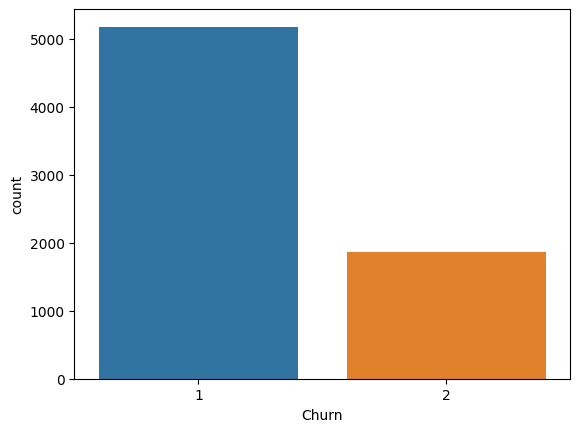

In [162]:
sns.countplot(data=df_merged, x='Churn');

The data is imbalanced and might affect the predictons, as the model could get biased towards Class 1. However, we could balance the data with certain techniques but that might affect the real predictions.

In [69]:
# spliting the data
X = df_merged.drop('Churn', axis=1)
y = df_merged['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1, stratify=y)

G. Normalize/Standardize the data with the best suitable approach.

In [70]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

In [71]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
2246,0,0,2,2,1,2,2,2,1,2,...,2,0,1.252068,-0.961266,1,0,0,0,1,0
6843,0,0,2,1,9,2,2,2,2,2,...,1,1,0.895785,-0.624012,1,0,0,0,1,0
159,1,0,1,1,10,2,2,1,1,1,...,1,1,-1.303514,-0.895370,0,0,1,0,0,1
6259,1,0,2,2,60,2,1,1,2,1,...,1,1,0.402982,1.001023,0,0,1,1,0,0
4291,0,0,2,2,64,2,2,2,2,1,...,1,1,1.513454,2.084933,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1,0,1,1,8,2,2,1,2,1,...,1,0,1.198792,-0.644445,1,0,0,0,1,0
3935,0,0,2,1,70,2,1,1,1,1,...,1,1,-1.498304,-0.419654,0,0,1,0,0,1
1128,1,0,1,1,27,2,1,1,1,1,...,2,0,-1.513288,-0.772459,1,0,0,0,0,1
318,1,1,2,1,24,2,1,1,1,2,...,2,0,0.942402,-0.020834,1,0,0,0,1,0


3. Model building and performance improvement : 

A. Train a model using Decision tree and check the performance of the model on train and test data

In [72]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [73]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.997515086971956
0.609652235628105


Model is overfitting

In [74]:
y_test

6826    1
687     2
3787    1
4130    1
640     1
       ..
3295    1
4039    1
3766    2
2541    1
936     1
Name: Churn, Length: 1409, dtype: category
Categories (2, int64): [1, 2]

In [75]:
y_pred1 = dTree.predict(X_test)
print(y_pred1)
len(y_pred1)

[2 1 1 ... 2 2 1]


1409

In [76]:
from sklearn.metrics import accuracy_score

r1 = accuracy_score(y_pred1, y_test)
r1

0.609652235628105

In [77]:
## Calculating feature importance
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                  Imp
gender                       0.036274
SeniorCitizen                0.018252
Partner                      0.016232
Dependents                   0.021709
tenure                       0.098336
PhoneService                 0.004414
MultipleLines                0.019821
OnlineSecurity               0.015601
OnlineBackup                 0.014646
DeviceProtection             0.013807
TechSupport                  0.012502
StreamingTV                  0.005584
StreamingMovies              0.010683
PaperlessBilling             0.028328
PaymentMethod                0.022043
MonthlyCharges               0.233555
TotalCharges                 0.198430
Contract_Month-to-month      0.161435
Contract_One year            0.004272
Contract_Two year            0.005302
InternetService_DSL          0.006962
InternetService_Fiber optic  0.051812
InternetService_No           0.000000


<Axes: >

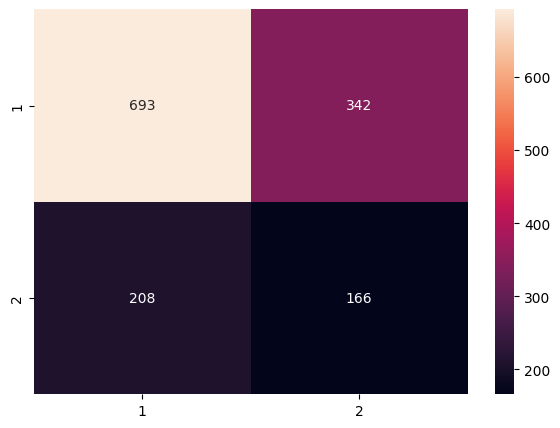

In [78]:
cm1 = confusion_matrix(y_test, y_pred1, labels=[1,2])
df_cm1 = pd.DataFrame(cm1, index = [i for i in ["1","2"]],
                  columns = [i for i in ["1","2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True ,fmt='g')

In [79]:
# lets try changig attributes

dTree_2 = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5)
dTree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [80]:
y_pred2 = dTree_2.predict(X_test)
y_pred2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [81]:
print(dTree_2.score(X_train, y_train))
print(dTree_2.score(X_test, y_test))

0.7976570820021299
0.7217885024840313


Although, the training accuracy is dropped in this model but we are not overfitting the model and getting better results.

In [103]:
r2 = accuracy_score(y_pred2, y_test)
r2

0.7217885024840313

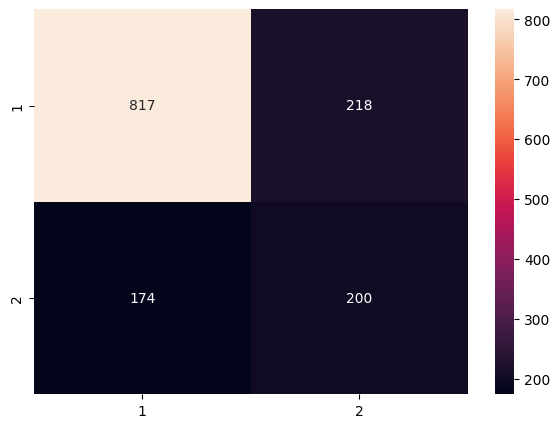

In [83]:
cm2 = confusion_matrix(y_test, y_pred2, labels=[1,2])
df_cm2 = pd.DataFrame(cm2, index = [i for i in ["1","2"]],
                  columns = [i for i in ["1","2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True ,fmt='g');

In [95]:
# comparing both models
targets = ['1','2']
print("Model 1")
print(classification_report(y_test, y_pred1,  target_names=targets))
print(" ")
print("Model 2")
print(classification_report(y_test, y_pred2,  target_names=targets))

Model 1
              precision    recall  f1-score   support

           1       0.77      0.67      0.72      1035
           2       0.33      0.44      0.38       374

    accuracy                           0.61      1409
   macro avg       0.55      0.56      0.55      1409
weighted avg       0.65      0.61      0.63      1409

 
Model 2
              precision    recall  f1-score   support

           1       0.82      0.79      0.81      1035
           2       0.48      0.53      0.51       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.72      0.73      1409



With the help of above data we could clearly see that there is an increase in Precision, recall and F1 score in second model. 

B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

In [85]:
dt = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [96]:
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_
print('Best Parameters:\n',best_params)
print('Best Decision Tree Model:\n',best_dt_model)

Best Parameters:
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Model:
 DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [97]:
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7912673056443025
Testing Accuracy: 0.7828246983676366


Model not overfitting and performing ok on training and testing data.

In [98]:
print(best_dt_model.score(X_train, y_train))
print(best_dt_model.score(X_test, y_test))

0.7912673056443025
0.7828246983676366


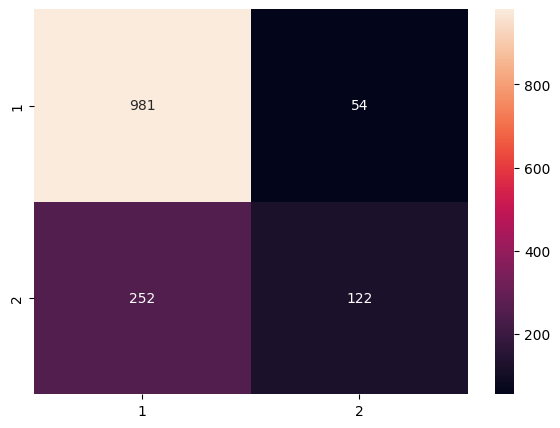

In [99]:
cm3 = confusion_matrix(y_test, y_test_pred, labels=[1,2])
df_cm3 = pd.DataFrame(cm3, index = [i for i in ["1","2"]],
                  columns = [i for i in ["1","2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3, annot=True ,fmt='g');

In [100]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree 1','Decision Tree 2', 'Grid Search Model'], 'accuracy':[r1,r2,test_accuracy]})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree 1,0.609652
1,Decision Tree 2,0.721789
2,Grid Search Model,0.782825


In [101]:
# comparing with model 2
print('Classification Report of dTree Model2 \n', classification_report(y_test, y_pred2,  target_names=targets))
print(" ")
print('Classification Report of Grid Search best Model \n', classification_report(y_test, y_test_pred,  target_names=targets))

Classification Report of dTree Model2 
               precision    recall  f1-score   support

           1       0.82      0.79      0.81      1035
           2       0.48      0.53      0.51       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.72      0.73      1409

 
Classification Report of Grid Search best Model 
               precision    recall  f1-score   support

           1       0.80      0.95      0.87      1035
           2       0.69      0.33      0.44       374

    accuracy                           0.78      1409
   macro avg       0.74      0.64      0.65      1409
weighted avg       0.77      0.78      0.75      1409



From the above data we could say that the accuracy of Grid search model from Q3B has been increased to 78% in comaprison to 72%  of dTree Model2 from Q3A. Below are the insigts from above metricis:

    1. For class 1 ( Here 1 is for Churn = No and 2 is churn = Yes ), the precision in Grid Search model is dcreased to 80% in comaprision to the dTree Model 2 85%. Whereas, recall is increased to 95% in Grid search model in comaprison to 79% of dTree model2. F1 score is increased to 87% in Grid Search model from 81% of dTree model 2.
    2. For class 2, the precision in Grid Search model is increased to 69% in comaprision to the dTree Model2 48%. Whereas, recall is decreased a lot to 33% in Grid search model in comaprison to 53% of dTree model2. F1 score is decreased to 44% in Grid Search model from 51% of dTree model 2.
    3. The Grid Search Model has a higher accuracy 78% compared to dTree Model2 with 72% accuracy.
    4. Grid search Model generally performs better in terms of precision and recall for class 1, achieving a higher recall and F1-score. However, this model has a lower recall and F1-score for class 2, suggesting it might not be as effective in identifying class 2 instances. 

C. Train a model using Random forest and check the performance of the model on train and test data.

In [136]:
rfcl = RandomForestClassifier(random_state=1)
rfcl.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [104]:
y_rf_pred = rfcl.predict(X_test)
y_rf_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [105]:
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

0.997515086971956
0.7842441447835344


Model is over fitting

In [106]:
rf_r = accuracy_score(y_rf_pred, y_test)
rf_r

0.7842441447835344

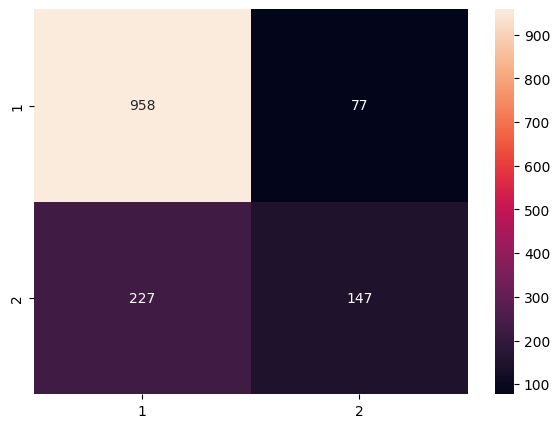

In [109]:
cm_rf = confusion_matrix(y_test, y_rf_pred, labels=[1,2])
df_rf = pd.DataFrame(cm_rf, index = [i for i in ["1","2"]],
                  columns = [i for i in ["1","2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_rf, annot=True ,fmt='g');

D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

In [110]:
rf_model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 5]
}

In [111]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [112]:
best_params_rf = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
print('Best Parameters for rf Model:\n',best_params_rf)
print('Best Random Forrest Model:\n',best_rf_model)

Best Parameters for rf Model:
 {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forrest Model:
 RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)


In [115]:
y_rf_pred2 = best_rf_model.predict(X_test)
y_rf_pred2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [118]:
best_rf_r = accuracy_score(y_test, y_rf_pred2)
best_rf_r

0.7913413768630234

In [116]:
print(best_rf_model.score(X_train, y_train))
print(best_rf_model.score(X_test, y_test))

0.8397231096911608
0.7913413768630234


This model is performing better than the previous one and in not overfitting.

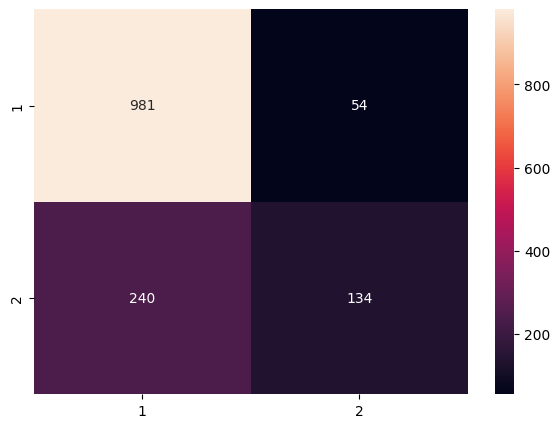

In [117]:
cm_rf2 = confusion_matrix(y_test, y_rf_pred2, labels=[1,2])
df_rf2 = pd.DataFrame(cm_rf2, index = [i for i in ["1","2"]],
                  columns = [i for i in ["1","2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_rf2, annot=True ,fmt='g');

In [119]:
# comparing both the models
targets = ['1','2']
print("Model 1: Random Forrest")
print(classification_report(y_test, y_rf_pred,  target_names=targets))
print(" ")
print("Model 2: Grid Search Random Forrest")
print(classification_report(y_test, y_rf_pred2,  target_names=targets))

Model 1: Random Forrest
              precision    recall  f1-score   support

           1       0.81      0.93      0.86      1035
           2       0.66      0.39      0.49       374

    accuracy                           0.78      1409
   macro avg       0.73      0.66      0.68      1409
weighted avg       0.77      0.78      0.76      1409

 
Model 2: Grid Search Random Forrest
              precision    recall  f1-score   support

           1       0.80      0.95      0.87      1035
           2       0.71      0.36      0.48       374

    accuracy                           0.79      1409
   macro avg       0.76      0.65      0.67      1409
weighted avg       0.78      0.79      0.77      1409



From the above data we could say that the accuracy of Grid search model (Moodel 2) from Q3D has been increased to 79% in comaprison to 78% of Randaom forrest Model (Model 1) from Q3C (Although the train accuracy is decreased in Model 2). Below are the insigts from above metricis:

    1. For class 1 ( Here 1 is for Churn = No and 2 is churn = Yes ), the precision in Model 2 is dcreased to 80% in comaprision to the Model 1 81%. Whereas, recall is increased to 95% in Model 2 in comaprison to 93% of Model 1. F1 score is increased to 87% in Model 2 from 86% of Model 1.
    2. For class 2, the precision in Model 2 is increased to 71% in comaprision to the Model 1 66%. Whereas, recall is decreased to 36% in Model 2 in comaprison to 39% of Model 1. F1 score is decreased to 48% in Model 2 from 59% of Model 1.
    3. The Grid Search Model(Model 2) has a higher accuracy 79% compared to Model 1 with 78% accuracy.
    4. Model 2 generally performs slightly better than Model 1, with a higher accuracy and better F1-scores for class 1. However, Model 2 has a lower recall for class 2, which means it may have more false negatives for that class.
    5. Both models have similar precision for class 1, but Model 2 has better precision for class 2.

E. Train a model using Adaboost and check the performance of the model on train and test data.

In [137]:
abcl = AdaBoostClassifier(random_state=1)
abcl.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [121]:
y_pred_abcl = abcl.predict(X_test)
y_pred_abcl

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [122]:
print("Train Accuracy: ",abcl.score(X_train, y_train))
print("Test Accuracy: ",abcl.score(X_test, y_test))

Train Accuracy:  0.8086616968406106
Test Accuracy:  0.2654364797728886


Model is Overfitting and performing poorly on test data.

In [123]:
abcl_r = accuracy_score(y_test, y_pred_abcl)
abcl_r

0.2654364797728886

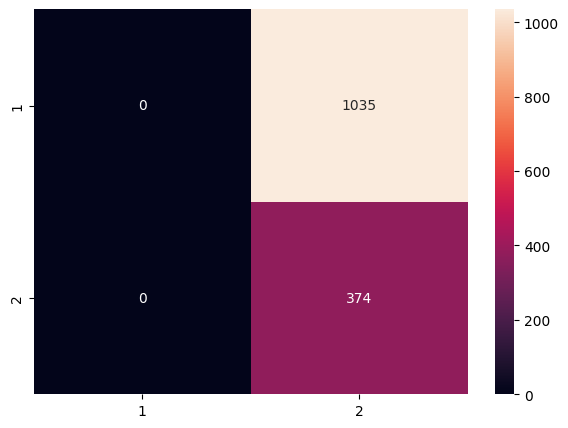

In [124]:
abcl_cm = confusion_matrix(y_test, y_pred_abcl, labels=[1,2])
df_abcl = pd.DataFrame(abcl_cm, index = [i for i in ["1","2"]],
                  columns = [i for i in ["1","2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_abcl, annot=True ,fmt='g');

The model is predicting everthing as 2 (Churn = Yes)

F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f

In [125]:
abcl_model = AdaBoostClassifier(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [126]:
grid_search = GridSearchCV(abcl_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [127]:
best_params_abcl = grid_search.best_params_
best_abcl_model = grid_search.best_estimator_
print("Best Parameters\n", best_params_abcl)
print("Best Model\n", best_abcl_model)

Best Parameters
 {'learning_rate': 1.0, 'n_estimators': 50}
Best Model
 AdaBoostClassifier(random_state=1)


In [129]:
y_pred_abcl2 = best_abcl_model.predict(X_test)
y_pred_abcl2

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [131]:
print(best_abcl_model.score(X_train, y_train))
print(best_abcl_model.score(X_test, y_test))

0.8086616968406106
0.2654364797728886


Same results again model is Overfitting and performing poorly on test data.

In [132]:
best_abcl_model_r = accuracy_score(y_test, y_pred_abcl2)
best_abcl_model_r

0.2654364797728886

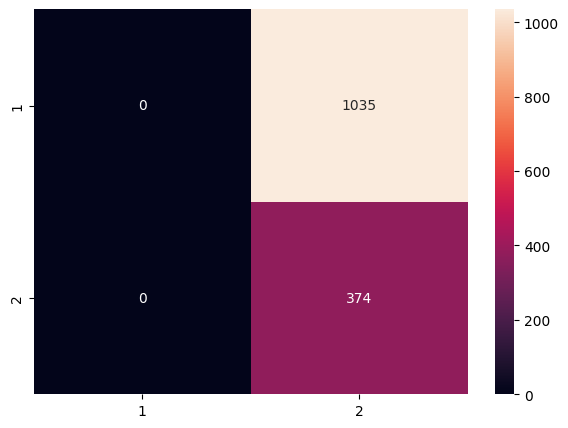

In [133]:
abcl_cm2 = confusion_matrix(y_test, y_pred_abcl2, labels=[1,2])
df_abcl2 = pd.DataFrame(abcl_cm2, index = [i for i in ["1","2"]],
                  columns = [i for i in ["1","2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_abcl2, annot=True ,fmt='g');

In [134]:
# comparing both the models
print("Model 1: Ada Boost Classifier")
print(classification_report(y_test, y_pred_abcl,  target_names=targets))
print(" ")
print("Model 2: Grid Search AdaBoostClassifier")
print(classification_report(y_test, y_pred_abcl2,  target_names=targets))

Model 1: Ada Boost Classifier
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1035
           2       0.27      1.00      0.42       374

    accuracy                           0.27      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.27      0.11      1409

 
Model 2: Grid Search AdaBoostClassifier
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1035
           2       0.27      1.00      0.42       374

    accuracy                           0.27      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.27      0.11      1409



C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ss\anaconda3\envs\Great_Learning_AI_ML\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Obesrvation and insights from above data:

    1. Both the models are overfitting, performing poorely on testing data and predicting everything as 2 (Churn = Yes), there is no improvement in the testing accuracy of both the models and both models gives same training and testing accuracy i.e. 80% and 27% respectively.
    2. Both models have very low precision, recall, and F1-scores for class 1, which suggests that they are unable to correctly identify class 1 instances. The precision and F1-score for class 1 are 0.00, indicating that there are no true positives for this class. This is a significant issue, and the models are failing to predict class 1.
    3. For class 2, both models have a recall of 1.00, indicating that they correctly identify all instances of class 2. However, the precision for class 2 is still low at 0.27, which means there is a high rate of false positives for this class.
    4. The overall accuracy for both models is 0.27, but this accuracy is largely driven by the high recall for class 2. The models are essentially classifying everything as class 2, resulting in an imbalanced and ineffective model.

G. Train a model using GradientBoost and check the performance of the model on train and test data

In [138]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [156]:
y_pred_gbcl = gbcl.predict(X_test)
y_pred_gbcl

array([2, 2, 2, ..., 2, 1, 1], dtype=int64)

In [141]:
print("Train Accuracy: ",gbcl.score(X_train, y_train))
print("Test Accuracy: ",gbcl.score(X_test, y_test))

Train Accuracy:  0.8246361377351793
Test Accuracy:  0.5812633073101491


Model is overfitting.

In [143]:
gbcl_r = accuracy_score(y_test, y_pred_gbcl)
gbcl_r

0.5812633073101491

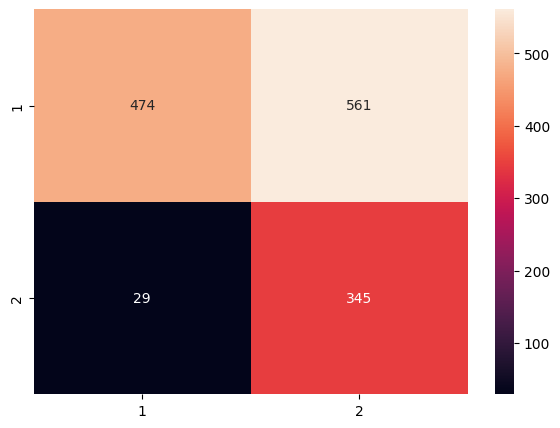

In [146]:
cm_gbcl = confusion_matrix(y_test, y_pred_gbcl, labels=[1,2])
df_gbcl = pd.DataFrame(cm_gbcl, index = [i for i in ["1","2"]],
                  columns = [i for i in ["1","2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_gbcl, annot=True ,fmt='g');

H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

In [148]:
gbcl_model = GradientBoostingClassifier(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5],
}

grid_search = GridSearchCV(gbcl_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [149]:
best_params_gbcl = grid_search.best_params_
best_gbcl_model = grid_search.best_estimator_
print("Best Parameters\n", best_params_gbcl)
print("Best Model\n", best_gbcl_model)

Best Parameters
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Model
 GradientBoostingClassifier(n_estimators=50, random_state=1)


In [158]:
y_pred_gbcl2 = best_gbcl_model.predict(X_test)
y_pred_gbcl2

array([1, 2, 1, ..., 2, 1, 1], dtype=int64)

In [153]:
print('Training accuracy',best_gbcl_model.score(X_train, y_train))
print('Testing accuracy',best_gbcl_model.score(X_test, y_test))

Training accuracy 0.8118565850195243
Testing accuracy 0.7132718239886444


Although the model is preforming fairly well, yet if we consider the +- 10% factor on training accuracy the model might be slightly overfitting.

In [159]:
best_gbcl_model_r = accuracy_score(y_test, y_pred_gbcl2)
best_gbcl_model_r

0.7132718239886444

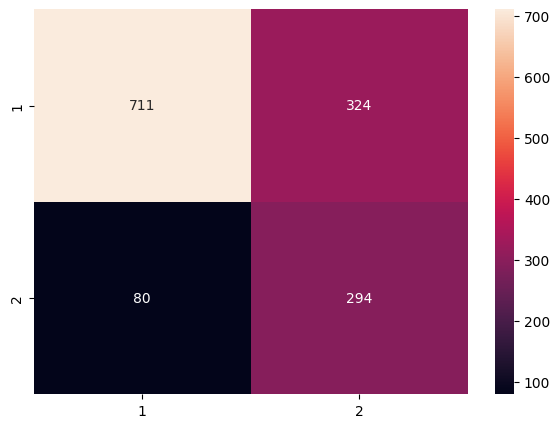

In [160]:
# confusion matrix
cm_gbcl = confusion_matrix(y_test, y_pred_gbcl2, labels=[1,2])
df_gbcl = pd.DataFrame(cm_gbcl, index = [i for i in ["1","2"]],
                  columns = [i for i in ["1","2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_gbcl, annot=True ,fmt='g');

In [161]:
# comparing both models
print("Model 1: Gradient Boosting Classifier")
print(classification_report(y_test, y_pred_gbcl,  target_names=targets))
print(" ")
print("Model 2: Grid Search Gradient Boosting Classifier")
print(classification_report(y_test, y_pred_gbcl2,  target_names=targets))

Model 1: Gradient Boosting Classifier
              precision    recall  f1-score   support

           1       0.94      0.46      0.62      1035
           2       0.38      0.92      0.54       374

    accuracy                           0.58      1409
   macro avg       0.66      0.69      0.58      1409
weighted avg       0.79      0.58      0.60      1409

 
Model 2: Grid Search Gradient Boosting Classifier
              precision    recall  f1-score   support

           1       0.90      0.69      0.78      1035
           2       0.48      0.79      0.59       374

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.71      0.73      1409



Observations and insights from the above data:

    1. The accuracy on testing data for Model 2 is increased to 71% in comparison to of Model 1 58%. However the training accuracy for Model 1 was 82 % whereas training accuracy of Model 1 is 81%.
    2.  For class 1 ( Here 1 is for Churn = No and 2 is churn = Yes ), the precision in Model 2 is dcreased to 90% in comaprision to the Model 1 94%. Whereas, recall is increased to 69% in Model 2 in comaprison to 46% of Model 1. F1 score is increased to 78% in Model 2 from 62% of Model 1.
    2. For class 2, the precision in Model 2 is increased to 48% in comaprision to the Model 1 38%. Whereas, recall is decreased to 79% in Model 2 in comaprison to 92% of Model 1. F1 score is increased to 59% in Model 2 from 54% of Model 1.
    3. Model 2, shows overall improved performance compared to Model 1. It achieves higher accuracy and F1-scores, indicating better classification results.
    4. Both models show a trade-off between precision and recall for class 1 and class 2. Model 2 achieves a better balance, particularly for class 1, where it has improved precision and recall.
    5. These insights suggest that hyperparameter tuning via grid search has effectively improved the model's classification performance.

I. Provide detailed analysis of the below steps:
(1) Compare the performance of each model in train stage and test stage

In [163]:
# storeing performance of every model in different variables

Decision_tree_train = dTree_2.score(X_train, y_train)
Grid_search_Decision_tree_train = best_dt_model.score(X_train, y_train)
Grid_search_Decision_tree_test = best_dt_model.score(X_test, y_test)
Random_forrest_train = rfcl.score(X_train, y_train)
Grid_search_Random_forrest_train = best_rf_model.score(X_train, y_train)
Ada_Boosting_train = abcl.score(X_train, y_train)
Grid_search_Ada_Boosting_train = best_abcl_model.score(X_train, y_train)
Gradient_Boost_train = gbcl.score(X_train, y_train)
Grid_search_Gradient_Boost_train = best_gbcl_model.score(X_train, y_train)

In [165]:
all_results = pd.DataFrame({'Model':['Decision Tree','Grid Search Decision Tree', 'Random Forrest', 'Grid Search Ranom forrest',
                                    'Ada Boosting', 'Grid Search Ada Boosting', 'Gradient Boosting', 
                                     'Grid Search Gradient Boosting'], 
                            'Train Score':[Decision_tree_train, Grid_search_Decision_tree_train, Random_forrest_train,
                                          Grid_search_Random_forrest_train, Ada_Boosting_train, Grid_search_Ada_Boosting_train
                                          , Gradient_Boost_train, Grid_search_Gradient_Boost_train],
                           'Test Score':[r2, Grid_search_Decision_tree_test, rf_r, best_rf_r, abcl_r, best_abcl_model_r,
                                        gbcl_r, best_gbcl_model_r]})
all_results                                        

,Model,Train Score,Test Score
0,Decision Tree,0.797657,0.721789
1,Grid Search Decision Tree,0.791267,0.782825
2,Random Forrest,0.997515,0.784244
3,Grid Search Ranom forrest,0.839723,0.791341
4,Ada Boosting,0.808662,0.265436
5,Grid Search Ada Boosting,0.808662,0.265436
6,Gradient Boosting,0.824636,0.581263
7,Grid Search Gradient Boosting,0.811857,0.713272


Observations:

    1. Among the Decision Tree models, the Grid Search Decision Tree performs better than the simple Decision Tree on the testing data, indicating that hyperparameter tuning has improved its performance.
    2. The Random Forest model has a high training score 99%, suggesting it may have overfit the training data. It performs reasonably well on the testing data but not significantly better than the tuned Grid Search Random Forest.
    3. The Ada Boosting models show a sharp difference between training and testing scores, indicating potential overfitting. The testing scores for both Ada Boosting models are notably lower compared to the training scores.
    4. The Gradient Boosting models demonstrate improved performance compared to the Ada Boosting models. The testing score for Grid Search Gradient Boosting model is notably higher than of Ada Boosting.
    5. The Grid Search Gradient Boosting model achieves the score 71% among the models, suggesting that hyperparameter tuning has effectively improved its performance.
    6. From all the above models Grid Search Ranom forrest model has achieved the highest testing score i.e. 79%.

(2) Provide your observation on which model performed the best

As mentioned above Grid Search Ranom forrest model outperforms other models by achieveing the highest test score. Also the difference between training score (83%) and testing score (79%) is very less indicating the model is trained well and haven't encountered overfitting or underfitting. So, the Grid Search Random Forest model performed the best.

(3) Provide your reasoning on why the model performed best

Grid Search Ranom forrest model has achieved the highest test score(79%). Also the difference between training score (83%) and testing score (79%) is very less indicating the model is trained well and haven't encountered overfitting or underfitting. The reason for better performance of the model is hyperparameter tuning via grid search, grid search was used to systematically explore different combinations of hyperparameters for the random forest model. This optimization process helps find the best set of hyperparameters that improve model performance. The tuning likely led to better parameter settings that enhance the model's predictive capabilities. Moreover, Random Forrest is known for its robustness to outliers and ability to handle overfitting well. 

(4) Provide your final conclusion on your observation

Final Obesrvations and Conclusions:

    1. Among the models evaluated, the Grid Search Random Forest model performed the best on the test data followed by the Grid Search Decision Tree and the Grid Search Gradient Boosting models. These models have shown improved performance to, making them strong candidates for further evaluation or deployment.
    2. Hyperparameter tuning through grid search significantly improved the performance of several models, including the Grid Search Random Forest, Grid Search Decision Tree and Grid Search Gradient Boosting. This emphasizes the importance of fine-tuning model parameters for optimal results.
    3. Many models, such as Ada Boosting showed signs of overfitting, as indicated by a notable performance gap between training and test scores. 
    4. Models that employed ensemble methods (Random Forest and Gradient Boosting) generally outperformed individual decision trees. They reduce overfitting, and improve accuracy.
    5. The choice of the best model depends on the specific problem, data characteristics, and the desired output. Here, the Grid Search Random Forest model could be selected as final model as it stands out as the best-performing model and is recommended for further evaluation or deployment.
    6. In conclusion, all the above evaluvation metricis highlights the importance of hyperparameter tuning, the effectiveness of ensemble methods, and the significance of addressing overfitting in model development.